In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    implementChainDecayLimit,
    fromHB5Table1,
    readHEPDataCsv
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions
import os, sys
from scipy.interpolate import griddata


sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution

# ATLAS 13TeV LHC

## pp -> A -> H Z -> bb vv, gg-fusion [	ATLAS-CONF-2023-034](http://cds.cern.ch/record/2862023)

No HEPdata entry available yet. The file ggH_LHC13_ATLAS_140_vv.json has been created
by hand using the data from Fig. 5 of the conf-note.

## pp -> A -> H Z -> bb vv, bb-associated [	ATLAS-CONF-2023-034](http://cds.cern.ch/record/2862023)

No HEPdata entry available yet. The file bbH_LHC13_ATLAS_140_vv.json has been created by hand using the data from Fig. 5 of the conf-note.

## pp -> A -> H Z -> bb ll, gg-fusion [2011.05639](https://arxiv.org/abs/2011.05639)

In [2]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1829873/Cross-section%20limits%20gluon-gluon%20fusion%20in%20llbb/1/csv"
)

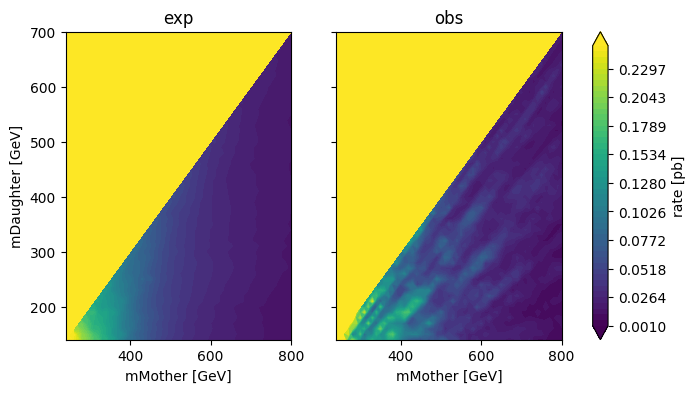

Looks good. Saving this to ggH_LHC13_ATLAS_139.json


In [4]:
dfR = pd.merge(dfs[0], dfs[1], on=["mA [GeV]", "mH [GeV]"], validate="1:1",).rename(
    columns={
        "mA [GeV]": "mMother",
        "mH [GeV]": "mDaughter",
        "Upper limit on  sigma(ggA) x B(A->ZH) x B(H->bb)  at 95% CL [pb]_x": "obs",
        "Upper limit on  sigma(ggA) x B(A->ZH) x B(H->bb)  at 95% CL [pb]_y": "exp",
    }
)

# Remove lowest daugther mass to avoid that h125 is considered
dfR = dfR[dfR["mDaughter"] > 135.0]

XX, YY = np.meshgrid(
    np.unique(dfR.mMother),
    np.unique(dfR.mDaughter),
)

df = pd.DataFrame(data={"mMother": XX.flatten(), "mDaughter": YY.flatten()})
df["exp"] = griddata(
    dfR[["mMother", "mDaughter"]],
    dfR.exp,
    df[["mMother", "mDaughter"]],
    fill_value=1e6,
)

df["obs"] = griddata(
    dfR[["mMother", "mDaughter"]],
    dfR.obs,
    df[["mMother", "mDaughter"]],
    fill_value=1e6,
)

# Set resolution of daughter mass to medMass to avoid that h125 is considered
# Is the more conservative approach
limitFile = implementChainDecayLimit(
    1829873,
    {"production": ["ggH"], "chain": "Z", "decay": ["bb"]},
    "https://doi.org/10.17182/hepdata.95826.v1/t7",
    df,
    massResolution={
        "daughter": resolution.bb["medMass"],
        "mother": resolution.bb["highMass"],
    },
    contourfPlotArgs={
        "levels": np.linspace(1e-3, 0.25),
        "extend": "both",
    },
    idSuffix=1,
)

## pp -> A -> H Z -> bb ll, bb-associated [2011.05639](https://arxiv.org/abs/2011.05639)

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1829873/Cross-section%20limits%20b-associated%20production%20in%20llbb/1/csv"
)

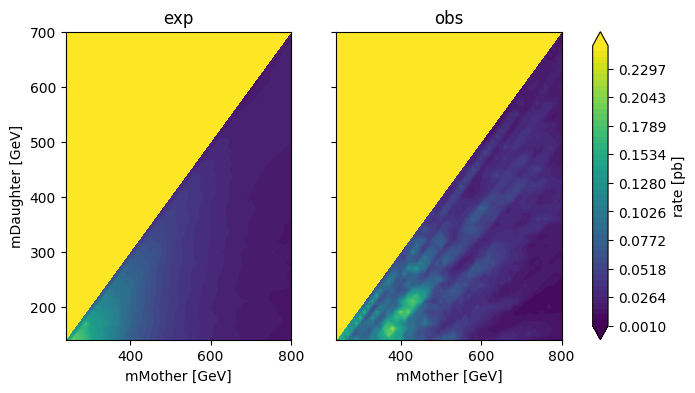

Looks good. Saving this to bbH_LHC13_ATLAS_139.json


In [6]:
dfR = pd.merge(dfs[0], dfs[1], on=["mA [GeV]", "mH [GeV]"], validate="1:1",).rename(
    columns={
        "mA [GeV]": "mMother",
        "mH [GeV]": "mDaughter",
        "Upper limit on  sigma(bbA) x B(A->ZH) x B(H->bb)  at 95% CL [pb]_x": "obs",
        "Upper limit on  sigma(bbA) x B(A->ZH) x B(H->bb)  at 95% CL [pb]_y": "exp",
    }
)

# Remove lowest daugther mass to avoid that h125 is considered
dfR = dfR[dfR["mDaughter"] > 135.0]

XX, YY = np.meshgrid(
    np.unique(dfR.mMother),
    np.unique(dfR.mDaughter),
)

df = pd.DataFrame(data={"mMother": XX.flatten(), "mDaughter": YY.flatten()})
df["exp"] = griddata(
    dfR[["mMother", "mDaughter"]],
    dfR.exp,
    df[["mMother", "mDaughter"]],
    fill_value=1e6,
)

df["obs"] = griddata(
    dfR[["mMother", "mDaughter"]],
    dfR.obs,
    df[["mMother", "mDaughter"]],
    fill_value=1e6,
)

# Set resolution of daughter mass to medMass to avoid that h125 is considered
# Is the more conservative approach
limitFile = implementChainDecayLimit(
    1829873,
    {"production": ["bbH"], "chain": "Z", "decay": ["bb"]},
    "https://doi.org/10.17182/hepdata.95826.v1/t7",
    df,
    massResolution={
        "daughter": resolution.bb["medMass"],
        "mother": resolution.bb["highMass"],
    },
    contourfPlotArgs={
        "levels": np.linspace(1e-3, 0.25),
        "extend": "both",
    },
    idSuffix=2,
)

## pp -> A -> H Z -> bb ll, b-associated [1804.01126](https://arxiv.org/abs/1804.01126)

Superseded by 2011.05639

The HEPdata table is mislabeled and does not include `BR(Z->ll)`.

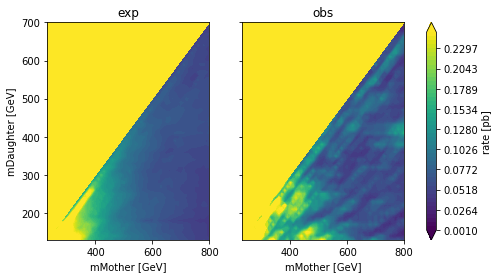

Looks good. Saving this to bbH_LHC13_ATLAS_36.json


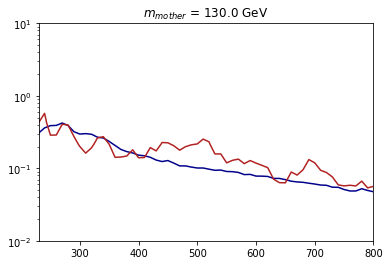

In [2]:
# dfs = readHEPDataCsv(
#     "https://www.hepdata.net/download/table/ins1665828/Table%203%3A%20Cross-section%20limits%20b-associated%20production/1/csv"
# )

# dfR = pd.merge(dfs[0], dfs[1], on=["mA [GeV]", "mH [GeV]"], validate="1:1",).rename(
#     columns={
#         "mA [GeV]": "mMother",
#         "mH [GeV]": "mDaughter",
#         "Upper limit on  sigma(bbA) X BR(A->ZH->llbb)  at 95% CL [pb]_x": "obs",
#         "Upper limit on  sigma(bbA) X BR(A->ZH->llbb)  at 95% CL [pb]_y": "exp",
#     }
# )


# XX, YY = np.meshgrid(
#     np.unique(dfR.mMother),
#     np.unique(dfR.mDaughter),
# )

# df = pd.DataFrame(data={"mMother": XX.flatten(), "mDaughter": YY.flatten()})
# df["exp"] = griddata(
#     dfR[["mMother", "mDaughter"]],
#     dfR.exp,
#     df[["mMother", "mDaughter"]],
#     fill_value=1e6,
# )

# df["obs"] = griddata(
#     dfR[["mMother", "mDaughter"]],
#     dfR.obs,
#     df[["mMother", "mDaughter"]],
#     fill_value=1e6,
# )

# limitFile = implementChainDecayLimit(
#     1665828,
#     {"production": ["bbH"], "chain": "Z", "decay": ["bb"]},
#     "https://doi.org/10.17182/hepdata.82527.v1/t3",
#     df,
#     massResolution={
#         "daughter": resolution.bb["highMass"],
#         "mother": resolution.bb["highMass"],
#     },
#     contourfPlotArgs={
#         "levels": np.linspace(1e-3, 0.25),
#         "extend": "both",
#     },
#     idSuffix=2,
# )
# lim = HB.Limit(limitFile)

# pred = Predictions()
# hh = pred.addParticle(HP.NeutralScalar("hh"))
# h1 = pred.addParticle(HP.NeutralScalar("h1"))
# hh.setDecayWidth("Z", "h1", 1.0)
# h1.setDecayWidth("bb", 1.0)
# h1.setMass(np.min(dfR.mDaughter))
# hm = np.unique(dfR.mMother)
# r = np.linspace(0.01, 10)


# def testAgainstLimit(mass, rate):
#     hh.setMass(mass)
#     hh.setCxn("LHC13", "bbH", rate)
#     app = lim.apply(pred)
#     if len(app) == 0:
#         return (0, 0)
#     return (app[0].expRatio(), app[0].obsRatio())


# test = np.frompyfunc(testAgainstLimit, 2, 2)
# XX, YY = np.meshgrid(hm, r)
# expR, obsR = test(XX, YY)
# fig, ax = plt.subplots()
# ax.set_yscale("log")
# expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
# obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
# expCc.collections[0].set_label("expRatio = 1")
# obsCc.collections[0].set_label("obsRatio = 1")
# ax.set_title(r"$m_{{mother}}$ = {} GeV".format(h1.mass()))
# plt.show()


## pp -> A -> H Z -> bb ll, gluon fusion [1804.01126](https://arxiv.org/abs/1804.01126)

Superseded by 2011.05639

The hepdata table is mislabled and does not include `BR(Z->ll)`

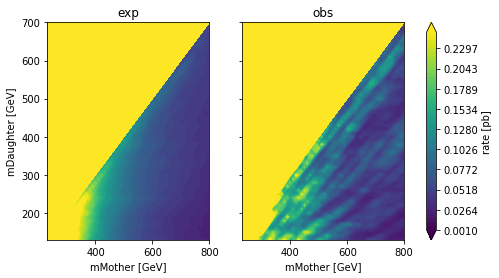

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


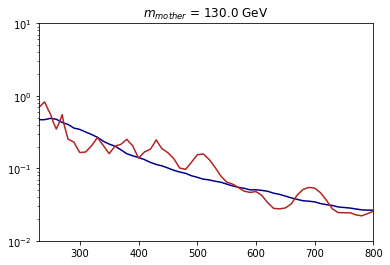

In [3]:
# dfs = readHEPDataCsv(
#     "https://www.hepdata.net/download/table/ins1665828/Table%202%3A%20Cross-section%20limits%20gluon-gluon%20fusion/1/csv"
# )

# dfR = pd.merge(dfs[0], dfs[1], on=["mA [GeV]", "mH [GeV]"], validate="1:1",).rename(
#     columns={
#         "mA [GeV]": "mMother",
#         "mH [GeV]": "mDaughter",
#         "Upper limit on  sigma(ggA) X BR(A->ZH->llbb)  at 95% CL [pb]_x": "obs",
#         "Upper limit on  sigma(ggA) X BR(A->ZH->llbb)  at 95% CL [pb]_y": "exp",
#     }
# )

# XX, YY = np.meshgrid(np.unique(dfR.mMother), np.unique(dfR.mDaughter))

# df = pd.DataFrame(data={"mMother": XX.flatten(), "mDaughter": YY.flatten()})
# df["exp"] = griddata(
#     dfR[["mMother", "mDaughter"]],
#     dfR.exp,
#     df[["mMother", "mDaughter"]],
#     fill_value=1e6,
# )

# df["obs"] = griddata(
#     dfR[["mMother", "mDaughter"]],
#     dfR.obs,
#     df[["mMother", "mDaughter"]],
#     fill_value=1e6,
# )

# limitFile = implementChainDecayLimit(
#     "1665828",
#     {"production": ["ggH"], "chain": "Z", "decay": ["bb"]},
#     "https://doi.org/10.17182/hepdata.82527.v1/t2",
#     df,
#     massResolution={
#         "daughter": resolution.bb["highMass"],
#         "mother": resolution.bb["highMass"],
#     },
#     contourfPlotArgs={
#         "levels": np.linspace(1e-3, 0.25),
#         "extend": "both",
#     },
#     idSuffix=1,
# )
# lim = HB.Limit(limitFile)

# pred = Predictions()
# hh = pred.addParticle(HP.NeutralScalar("hh"))
# h1 = pred.addParticle(HP.NeutralScalar("h1"))
# hh.setDecayWidth("Z", "h1", 1.0)
# h1.setDecayWidth("bb", 1.0)
# h1.setMass(np.min(dfR.mDaughter))
# hm = np.unique(dfR.mMother)
# r = np.linspace(0.01, 10)


# def testAgainstLimit(mass, rate):
#     hh.setMass(mass)
#     hh.setCxn("LHC13", "ggH", rate)
#     app = lim.apply(pred)
#     if len(app) == 0:
#         return (0, 0)
#     return (app[0].expRatio(), app[0].obsRatio())


# test = np.frompyfunc(testAgainstLimit, 2, 2)
# XX, YY = np.meshgrid(hm, r)
# expR, obsR = test(XX, YY)
# fig, ax = plt.subplots()
# ax.set_yscale("log")
# expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
# obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
# expCc.collections[0].set_label("expRatio = 1")
# obsCc.collections[0].set_label("obsRatio = 1")
# ax.set_title(r"$m_{{mother}}$ = {} GeV".format(h1.mass()))
# plt.show()


# ATLAS 8TeV LHC

## `A>Zh125, h125>bb` [1502.04478](https://arxiv.org/abs/1502.04478)


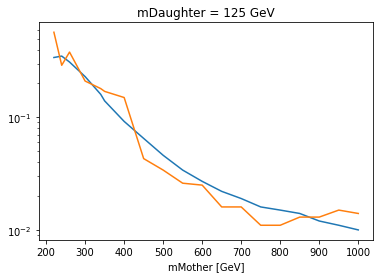

Looks good. Saving this to H_LHC8_ATLAS_20.json


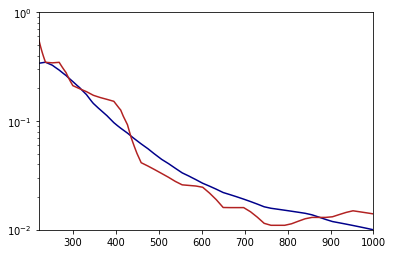

In [4]:
df = pd.DataFrame(
    {
        "mMother": [220, 240, 260, 300, 340] + list(range(350, 1001, 50)),
        "obs": [0.57, 0.29, 0.38, 0.21, 0.18, 0.17, 0.15, 0.043, 0.034, 0.026]
        + [0.025, 0.016, 0.016, 0.011, 0.011, 0.013, 0.013, 0.015, 0.014],
        "exp": [0.34, 0.35, 0.31, 0.23, 0.16, 0.14, 0.092, 0.065, 0.046, 0.034]
        + [0.027, 0.022, 0.019, 0.016, 0.015, 0.014, 0.012, 0.011, 0.010],
        "mDaughter": 125,
    }
)


limitFile = implementChainDecayLimit(
    "1502.04478",
    {"production": ["H"], "chain": "Z", "decay": ["bb"]},
    "Aux Tab 5",
    df,
    massResolution={
        "daughter": {
            "absolute": 20,  # guess, may be a lot larger
            "relative": 0.0,
        },
        "mother": resolution.tautau["default"],
    },
    idSuffix=1,  # 2 is h125>tautau
)

lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("Z", "h1", 1.0)
h1.setDecayWidth("bb", 1.0)
h1.setMass(125)
hm = np.linspace(220, 1000)
r = np.linspace(1e-2, 1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC8", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
ax.set_yscale("log")
plt.show()
